In [1]:
a=1

In [124]:
import chainer.links as L

In [125]:
np.random.seed(3) # 乱数のシードを固定
link = L.Linear(3,2)

In [126]:
link.W

variable W([[ 1.03266513,  0.25201908,  0.05571284],
            [-1.07588804, -0.16015016, -0.20482019]])

In [127]:
import chainer
chainer.__version__

'2.0.2'

In [128]:
import numpy as numpy
x = np.array([[1,2,3]], dtype = np.float32)
u = link(x)

In [129]:
u

variable([[ 1.70384192, -2.01064897]])

In [130]:
# zの計算
import chainer.functions as F

In [224]:
z = F.relu(u)
print(z)

variable([[ 1.70384192  0.        ]])


### ４層のモデルを定義
* 想定
    * 入力層
    * 2層目 ノード100
    * 3層目 ノード30
    * 出力層

In [225]:
class NN(chainer.Chain):
 
    # モデルの構造を明示
    def __init__(self, n_units1, n_units2, n_output):
        super().__init__()
        with self.init_scope():
            self.l1 = L.Linear(None, n_units1)
            self.l2 = L.Linear(None, n_units2)
            self.l3 = L.Linear(None, n_output)
            #self.l1 = L.Linear(1, 100)
            #self.l2 = L.Linear(100, 30)
            #self.l3 = L.Linear(30, 1)
 
    # 損失関数の計算
    def __call__(self, x, t):
        y = self.predict(x)
        loss = F.mean_squared_error(t, y)
        return loss
 
    # 予測値の計算（推論）
    def predict(self, x):
        # 1層
        z1 = F.relu(self.l1(x))
        #u1 = self.l1(x)
        #z1 = F.relu(u1)
        
        # 2層
        z2 = F.relu(self.l2(z1))
        #u2 = self.l2(z1)
        #z2 = F.relu(u2)
        
        #y = self.l3(z2)
        return self.l3(z2)

In [226]:
# インスタンス化
n_units1 = 100
n_units2 = 30
n_output = 1

np.random.seed(1) # 乱数のシードを固定
model = NN(n_units1, n_units2, n_output)

In [227]:
model.l1.W

variable W(None)

In [228]:
from chainer import optimizers

In [229]:
optimizer = optimizers.SGD() # 補足：確率的勾配降下法

In [230]:
optimizer.setup(model)  # modelと紐付ける

In [231]:
x = np.linspace(-3, 3, 100).reshape(100,1)
t = np.sin(x)

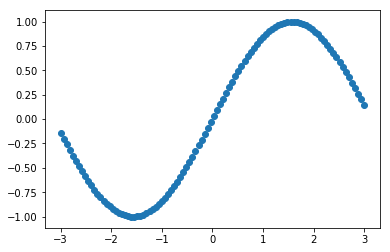

In [232]:
import matplotlib.pyplot as plt
plt.scatter(x,t) # 散布図
plt.show()

## ここからニューラルネットワークで検証

In [233]:
from chainer import Variable

# 事前にnp.float32に変換
x = np.array(x, dtype=np.float32)
t = np.array(t, dtype=np.float32)

# Chainer用の変数として宣言
x_ch = Variable(x)
t_ch = Variable(t)

In [234]:
type(t)
type(t_ch)

chainer.variable.Variable

### モデルを学習させよう

In [235]:
# 1000回順伝播と逆伝播を繰り返す
#for i in range(1000):
#    model.cleargrads()  # 勾配情報の初期化（chainerの仕様）
#    # Chainer1系の人は model.zerograds() を使ってください
#    loss = model(x_ch, t_ch)  # 順伝播（評価関数の計算）
#    loss.backward()  # 勾配（傾き）の計算 <-　誤差逆伝播法が使用されている
#    optimizer.update()  # パラメータの調整

### 学習の様子が見れるようにする

In [236]:
losses = []  # 追記：訓練結果保存用のリスト
for i in range(1000):
    model.cleargrads()
    loss = model(x_ch, t_ch)
    loss.backward()
    optimizer.update()
    # 追記：プロットするように保存しておく
    losses.append(loss.data)

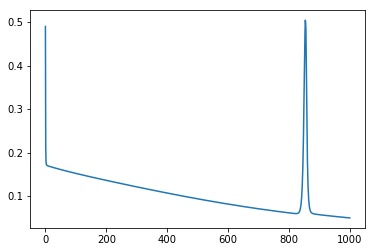

In [237]:
plt.plot(losses)
plt.show()

### 予測値の推論

In [238]:
y = model.predict(x_ch).data # dataをつけることでnumpyのarrayに変換できる

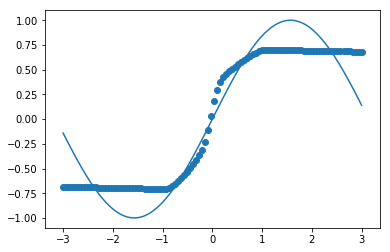

In [239]:
plt.plot(x, t)  # 教師データ
plt.scatter(x, y)  # 予測値 散布図
plt.show()

## 課題
* 順伝播と逆伝播を5000回繰り返して、結果を確認する

In [240]:
# インスタンス化
n_units1 = 100
n_units2 = 30
n_output = 1

np.random.seed(1) # 乱数のシードを固定
model = NN(n_units1, n_units2, n_output)

In [241]:
from chainer import optimizers
optimizer = optimizers.SGD() # 補足：確率的勾配降下法
optimizer.setup(model)  # modelと紐付ける

In [242]:
x = np.linspace(-3, 3, 100).reshape(100,1)
t = np.sin(x)

In [243]:
from chainer import Variable

# 事前にnp.float32に変換
x = np.array(x, dtype=np.float32)
t = np.array(t, dtype=np.float32)

# Chainer用の変数として宣言
x_ch = Variable(x)
t_ch = Variable(t)

In [244]:
losses = []  # 追記：訓練結果保存用のリスト
for i in range(5000):
    model.cleargrads()
    loss = model(x_ch, t_ch)
    loss.backward()
    optimizer.update()
    # 追記：プロットするように保存しておく
    losses.append(loss.data)

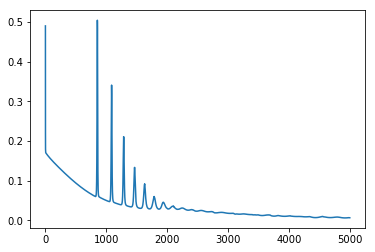

In [245]:
plt.plot(losses)
plt.show()

In [246]:
y = model.predict(x_ch).data # dataをつけることでnumpyのarrayに変換できる

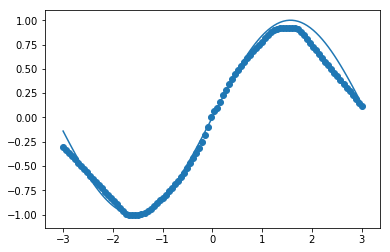

In [247]:
plt.plot(x, t)  # 教師データ
plt.scatter(x, y)  # 予測値 散布図
plt.show()

## 発展課題
* 層の数（今回４つ）やノードの数を変えて、挙動を確認する

In [248]:
class NN2(chainer.Chain):
 
    # モデルの構造を明示
    def __init__(self, n_units1, n_units2, n_units3, n_output):
        super().__init__()
        with self.init_scope():
            self.l1 = L.Linear(None, n_units1)
            self.l2 = L.Linear(None, n_units2)
            self.l3 = L.Linear(None, n_units3)
            self.l4 = L.Linear(None, n_output)
 
    # 損失関数の計算
    def __call__(self, x, t):
        y = self.predict(x)
        loss = F.mean_squared_error(t, y)
        return loss
 
    # 予測値の計算（推論）
    def predict(self, x):
        # 1層
        z1 = F.relu(self.l1(x))
        # 2層
        z2 = F.relu(self.l2(z1))
        # 3層
        z3 = F.relu(self.l3(z2))
        return self.l4(z3)

In [249]:
# インスタンス化
n_units1 = 100
n_units2 = 30
n_units3 = 50
n_output = 1

np.random.seed(1) # 乱数のシードを固定
model = NN2(n_units1, n_units2, n_units3, n_output)

In [250]:
from chainer import optimizers
optimizer = optimizers.SGD() # 補足：確率的勾配降下法
optimizer.setup(model)  # modelと紐付ける

In [251]:
x = np.linspace(-3, 3, 100).reshape(100,1)
t = np.sin(x)

In [252]:
from chainer import Variable

# 事前にnp.float32に変換
x = np.array(x, dtype=np.float32)
t = np.array(t, dtype=np.float32)

# Chainer用の変数として宣言
x_ch = Variable(x)
t_ch = Variable(t)

In [253]:
losses = []  # 追記：訓練結果保存用のリスト
for i in range(1000):
    model.cleargrads()
    loss = model(x_ch, t_ch)
    loss.backward()
    optimizer.update()
    # 追記：プロットするように保存しておく
    losses.append(loss.data)

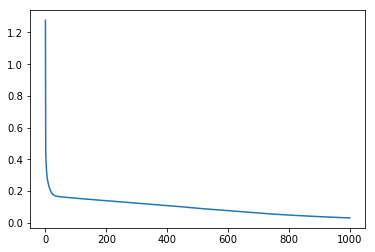

In [254]:
plt.plot(losses)
plt.show()

In [255]:
y = model.predict(x_ch).data # dataをつけることでnumpyのarrayに変換できる

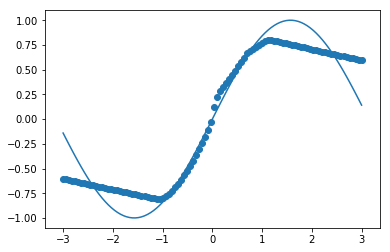

In [256]:
plt.plot(x, t)  # 教師データ
plt.scatter(x, y)  # 予測値 散布図
plt.show()

## ちなみにOptimezerをAdamに変えてみる

In [257]:
class NN(chainer.Chain):
 
    # モデルの構造を明示
    def __init__(self, n_units1, n_units2, n_output):
        super().__init__()
        with self.init_scope():
            self.l1 = L.Linear(None, n_units1)
            self.l2 = L.Linear(None, n_units2)
            self.l3 = L.Linear(None, n_output)
 
    # 損失関数の計算
    def __call__(self, x, t):
        y = self.predict(x)
        loss = F.mean_squared_error(t, y)
        return loss
 
    # 予測値の計算（推論）
    def predict(self, x):
        # 1層
        z1 = F.relu(self.l1(x))
        # 2層
        z2 = F.relu(self.l2(z1))
        return self.l3(z2)

In [258]:
# インスタンス化
n_units1 = 100
n_units2 = 30
n_output = 1

np.random.seed(1) # 乱数のシードを固定
model = NN(n_units1, n_units2, n_output)

In [259]:
from chainer import optimizers
optimizer = optimizers.Adam()
optimizer.setup(model)  # modelと紐付ける

In [260]:
x = np.linspace(-3, 3, 100).reshape(100,1)
t = np.sin(x)

In [261]:
from chainer import Variable

# 事前にnp.float32に変換
x = np.array(x, dtype=np.float32)
t = np.array(t, dtype=np.float32)

# Chainer用の変数として宣言
x_ch = Variable(x)
t_ch = Variable(t)

In [262]:
losses = []  # 追記：訓練結果保存用のリスト
for i in range(1000):
    model.cleargrads()
    loss = model(x_ch, t_ch)
    loss.backward()
    optimizer.update()
    # 追記：プロットするように保存しておく
    losses.append(loss.data)

### 1000回でも学習が収束しているのが分かる。。

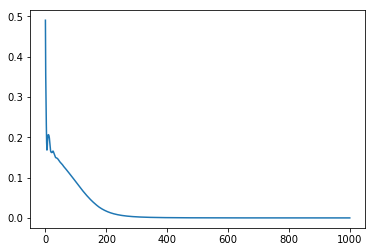

In [263]:
plt.plot(losses)
plt.show()

In [264]:
y = model.predict(x_ch).data # dataをつけることでnumpyのarrayに変換できる

### Oh..完全にフィット（予測）できている。。

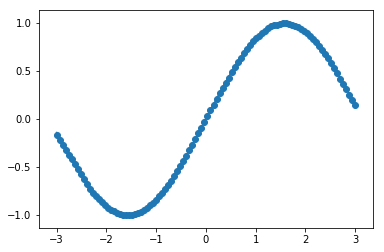

In [265]:
plt.plot(x, t)  # 教師データ
plt.scatter(x, y)  # 予測値 散布図
plt.show()

## Trainerを使っていこう

In [267]:
from chainer import report

In [268]:
class NN(chainer.Chain):
    
    def __init__(self, n_units1, n_units2, n_output):
        super().__init__()
        with self.init_scope():
            self.l1 = L.Linear(None, n_units1)
            self.l2 = L.Linear(None, n_units2)
            self.l3 = L.Linear(None, n_output)
 
    def __call__(self, x, t, train=True):
        y = self.predict(x)
        loss = F.mean_squared_error(y, t)
        if train:
            report({'loss': loss}, self)
        return loss
        
    def predict(self, x):
        z1 = F.relu(self.l1(x))
        z2 = F.relu(self.l2(z1))
        return self.l3(z2)

In [269]:
# 乱数のシードを固定 (再現性の確保)
np.random.seed(1)
 
# モデルの宣言
n_units1, n_units2, n_output = 100, 30, 1
model = NN(n_units1, n_units2, n_output)
 
# optimizerの設定
optimizer = optimizers.Adam() # とりあえずAdam使っとけ
optimizer.setup(model)

In [272]:
# データセットの準備
dataset = list(zip(x, t))

In [277]:
int(len(dataset) * 0.7)

70

In [279]:
from chainer.datasets import split_dataset_random
 
n_train = int( len(dataset) * 0.7 )  # 訓練データのサイズ
train, test = split_dataset_random(dataset, n_train, seed=1) # seedのoptionがあるかは超重要

In [281]:
len(test)
len(train)

70

In [283]:
batchsize = 20 # バッチサイズ
train_iter = chainer.iterators.SerialIterator(train, batchsize)
test_iter  = chainer.iterators.SerialIterator(test,  batchsize, repeat=False, shuffle=False)

In [284]:
from chainer import training
updater = training.StandardUpdater(train_iter, optimizer, device=-1) # device -1:
# updater = training.StandardUpdater(train_iter, optimizer)

In [285]:
# trainerとそのextensionsの設定
from chainer.training import extensions

# trainerの基本設定
epoch = 1000
trainer = training.Trainer(updater, (epoch, 'epoch'), out='result')

# 検証データで評価
trainer.extend(extensions.Evaluator(test_iter, model, device=-1))

# 学習結果の途中を表示する
trainer.extend(extensions.LogReport(trigger=(1, 'epoch')))

# １エポックごとに、trainデータに対するlossと、testデータに対するloss、経過時間（elapsed_time）を標準出力させる
trainer.extend(extensions.PrintReport(['epoch', 'main/loss', 'validation/main/loss', 'elapsed_time']), trigger=(1, 'epoch'))

In [286]:
# 学習を実行！！
trainer.run() # ちなみに自動的にログがresultフォルダにできている

epoch       main/loss   validation/main/loss  elapsed_time
1           0.480527    0.277528              0.0255864     
2           0.206597    0.253576              0.0415688     
3           0.200485    0.171889              0.0584161     
4           0.268708    0.141245              0.0720713     
5           0.202333    0.163532              0.0890684     
6           0.162949    0.192653              0.102551      
7           0.165224    0.222079              0.11961       
8           0.186866    0.235067              0.133358      
9           0.159226    0.200474              0.150078      
10          0.163326    0.168193              0.163954      
11          0.151687    0.151185              0.180364      
12          0.158771    0.152751              0.193956      
13          0.14882     0.161873              0.210845      
14          0.14619     0.168078              0.238383      
15          0.144541    0.186804              0.257926      
16          0.148636    0.

138         0.00559587  0.00637116            2.77121       
139         0.00590484  0.00467762            2.79295       
140         0.00527345  0.00538127            2.8136        
141         0.00596364  0.00458762            2.83787       
142         0.00400093  0.00624629            2.85901       
143         0.00443582  0.00453166            2.8853        
144         0.00505909  0.00400946            2.90709       
145         0.00449914  0.00583268            2.93261       
146         0.00420292  0.00479592            2.95587       
147         0.00407836  0.00354089            2.98651       
148         0.00460085  0.00378408            3.00943       
149         0.00359454  0.00566903            3.03502       
150         0.00435485  0.00466114            3.0566        
151         0.00375158  0.00307434            3.08216       
152         0.00391226  0.00388488            3.09964       
153         0.003316    0.00387605            3.12031       
154         0.00382602  

269         0.000420072  0.000659738           6.22525       
270         0.000414247  0.000584027           6.25615       
271         0.000377557  0.000514612           6.29477       
272         0.000377886  0.000423362           6.33159       
273         0.00048746  0.000531061           6.36848       
274         0.000276494  0.000648213           6.39357       
275         0.000345855  0.000513838           6.4217        
276         0.00043696  0.000456895           6.449         
277         0.000331446  0.000487985           6.47919       
278         0.000452311  0.000402517           6.50604       
279         0.00048555  0.000418014           6.5341        
280         0.000431044  0.000415063           6.55949       
281         0.000363282  0.000858069           6.58793       
282         0.00042902  0.000764218           6.61422       
283         0.000506021  0.000973089           6.64241       
284         0.000461094  0.00038981            6.66996       
285         

396         0.000147337  0.000213471           9.27719       
397         0.000122706  0.000228166           9.30381       
398         0.000206063  0.000197454           9.33027       
399         0.000112187  0.00017477            9.36504       
400         0.000120645  0.000141555           9.39683       
401         9.1276e-05  0.000162736           9.43513       
402         8.88441e-05  0.000358667           9.47          
403         0.000103628  0.00014061            9.51603       
404         9.21794e-05  0.000152919           9.55202       
405         8.68356e-05  0.000140025           9.58907       
406         0.00012344  0.000211771           9.62318       
407         9.21111e-05  0.000207273           9.66064       
408         0.000123211  0.000163336           9.70013       
409         9.7845e-05  0.000193949           9.73888       
410         0.000119947  0.000146648           9.76998       
411         0.000105617  0.000147399           9.80473       
412        

525         0.000266176  0.00027363            13.8448       
526         0.00015024  0.00015937            13.8855       
527         0.000123448  0.00029381            13.9292       
528         0.000109108  0.000221504           13.9688       
529         9.1825e-05  0.000264656           14.0124       
530         0.000100641  0.000172271           14.0531       
531         8.81487e-05  0.000182264           14.0997       
532         6.90125e-05  8.93839e-05           14.1437       
533         5.48338e-05  9.4284e-05            14.1901       
534         6.40755e-05  0.000136421           14.2313       
535         7.23852e-05  0.000119798           14.2621       
536         5.78313e-05  7.65649e-05           14.2919       
537         5.52948e-05  0.000110663           14.3224       
538         5.22311e-05  0.000112576           14.3512       
539         6.04768e-05  0.000117853           14.3816       
540         6.59321e-05  0.000115364           14.4098       
541       

656         8.54519e-05  0.000113444           18.4739       
657         6.45575e-05  9.28743e-05           18.5131       
658         9.16918e-05  7.6885e-05            18.5583       
659         6.11415e-05  8.5914e-05            18.6162       
660         7.65036e-05  8.41358e-05           18.6639       
661         4.38195e-05  0.000188086           18.7202       
662         4.31376e-05  0.000233818           18.7724       
663         9.64759e-05  0.000443152           18.8224       
664         0.000116098  0.000109997           18.8472       
665         7.77849e-05  0.000187856           18.8724       
666         5.91711e-05  0.00016139            18.8976       
667         0.000109058  0.000215455           18.9245       
668         0.000114669  0.00025487            18.9499       
669         8.16787e-05  0.000252762           18.9863       
670         9.29028e-05  0.00011776            19.0325       
671         0.000141084  0.000760703           19.081        
672     

786         0.000247665  0.000227307           24.665        
787         0.000114571  0.000132031           24.7244       
788         0.000106823  0.000562675           24.7653       
789         0.000202302  0.000220616           24.8092       
790         0.000132193  0.000189809           24.8793       
791         0.000112457  0.00017763            24.9299       
792         0.000100104  0.000474185           25.008        
793         0.000143189  0.00022529            25.0608       
794         0.000153215  0.000189915           25.1115       
795         0.000104999  0.000741447           25.1699       
796         0.000204191  0.000358528           25.2259       
797         0.000123643  0.000275138           25.2696       
798         9.50977e-05  0.000188927           25.3114       
799         0.00010884  0.000115377           25.3567       
800         4.69741e-05  0.000179103           25.3978       
801         7.2613e-05  7.78857e-05           25.4411       
802       

916         0.000136222  0.00016508            31.3111       
917         0.00011449  0.000415967           31.3523       
918         0.000166658  0.000606152           31.4123       
919         0.000327205  0.000584269           31.475        
920         0.000214694  0.000702723           31.5344       
921         0.000181739  0.000309057           31.5985       
922         0.000115235  0.000458816           31.6582       
923         0.000155706  7.75644e-05           31.7212       
924         0.000105326  0.000304588           31.7659       
925         0.000114291  0.000211653           31.8175       
926         0.000107751  0.000144706           31.879        
927         5.90215e-05  7.44998e-05           31.9432       
928         4.23729e-05  0.000156496           32.0057       
929         7.27623e-05  0.000133861           32.0696       
930         5.32419e-05  9.94597e-05           32.1309       
931         6.28149e-05  0.00025963            32.1972       
932      

### それでは学習結果を見てみよう

In [290]:
import json
with open('result/log') as f:
     logs = json.load(f)

In [291]:
result_train = [ log['main/loss'] for log in logs ]
result_test  = [ log['validation/main/loss'] for log in logs ]

### 検証用のデータも収束しているかを注意すべき

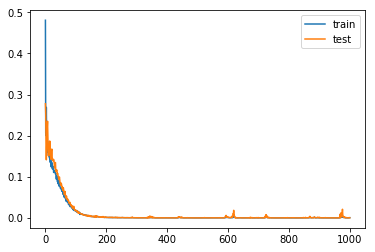

In [289]:
plt.plot(result_train, label='train')  # 訓練データ
plt.plot(result_test,  label='test')  # 検証データ
plt.legend()  # 凡例表示
plt.show()

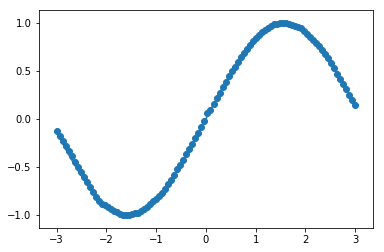

In [293]:
# プロット
y = model.predict(x)
plt.plot(x, t)
plt.scatter(x, y.data)
plt.show()